In [134]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso 

In [135]:
media_wise = pd.read_excel("train.xlsx", sheet_name='data')

In [136]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [137]:
media_wise

,year,week,weekB,SalesRub,Sales,SalesRubMonth,R1,R2,R3,R4,...,InvTVReg12,Total12,TRP13,CoverageTV13,InvTV13,InvDigital13,InvSponsorTV13,InvOON13,InvRadio13,Total13
0,2019,1,2018-12-31,41535567.34,114621.15,0.00,0.00,0.00,0.00,0.00,...,7155663.63,11834254.13,207.90,15.36,9085528.01,0.00,0.00,0.00,0.00,9085528.01
1,2019,2,2019-01-07,51222286.23,141523.20,0.00,0.00,0.00,0.00,0.00,...,8348274.24,13996532.16,317.47,25.53,10599782.68,0.00,0.00,0.00,0.00,10599782.68
2,2019,3,2019-01-14,57127348.91,157926.30,0.00,0.00,0.00,0.00,0.00,...,8348274.24,11466294.66,192.82,13.91,10599782.68,0.00,0.00,0.00,0.00,10599782.68
3,2019,4,2019-01-21,63040990.94,173746.65,0.00,0.00,0.00,0.00,0.00,...,8348274.24,10764632.16,138.37,8.05,10599782.68,0.00,0.00,0.00,0.00,10599782.68
4,2019,5,2019-01-28,67336888.87,185551.80,0.00,0.00,0.00,0.00,0.00,...,8477038.25,10984967.91,286.98,24.22,12893092.41,0.00,0.00,0.00,0.00,12893092.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2024,49,2024-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,2024,50,2024-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,2024,51,2024-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,2024,52,2024-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
media_wise.dtypes

year                       int64
week                       int64
weekB             datetime64[ns]
SalesRub                 float64
Sales                    float64
                       ...      
InvDigital13             float64
InvSponsorTV13           float64
InvOON13                 float64
InvRadio13               float64
Total13                  float64
Length: 135, dtype: object

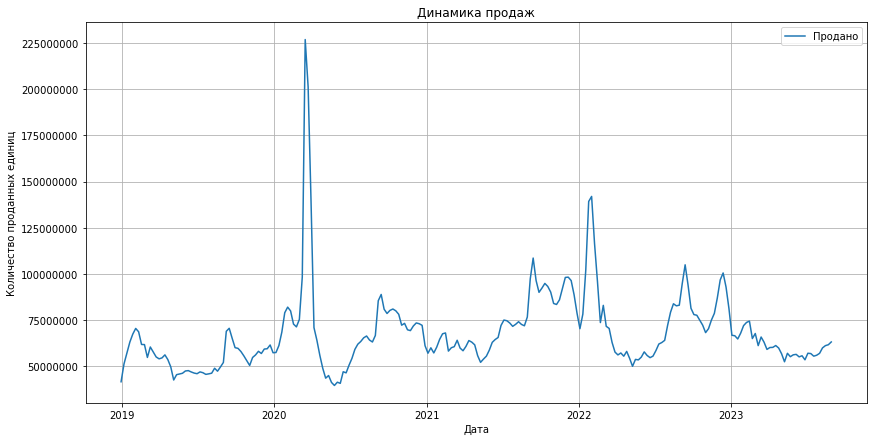

In [139]:
import datetime
import matplotlib.pyplot as plt

# Функция для преобразования года и недели в дату
def year_week_to_date(year, week):
    first_day_of_year = datetime.date(year, 1, 1)
    if first_day_of_year.weekday() <= 3:
        first_day_of_year -= datetime.timedelta(days=first_day_of_year.weekday())  
    else:
        first_day_of_year += datetime.timedelta(days=7-first_day_of_year.weekday())
    week_start = first_day_of_year + datetime.timedelta(weeks=week-1)
    return week_start

# Применить функцию к каждой строке датафрейма (предполагая, что данные уже загружены в mixvel)
media_wise['Дата'] = media_wise.apply(lambda row: year_week_to_date(row['year'], row['week']), axis=1)

# Сортировка данных по дате
media_wise = media_wise.sort_values('Дата')


plt.figure(figsize=(14, 7))
plt.ticklabel_format(style='plain', axis='y')
plt.plot(media_wise['Дата'], media_wise['SalesRub'], label='Продано')
plt.title('Динамика продаж')
plt.xlabel('Дата')
plt.ylabel('Количество проданных единиц')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
media_wise 

,year,week,weekB,SalesRub,Sales,SalesRubMonth,R1,R2,R3,R4,...,Total12,TRP13,CoverageTV13,InvTV13,InvDigital13,InvSponsorTV13,InvOON13,InvRadio13,Total13,Дата
0,2019,1,2018-12-31,41535567.34,114621.15,0.00,0.00,0.00,0.00,0.00,...,11834254.13,207.90,15.36,9085528.01,0.00,0.00,0.00,0.00,9085528.01,2018-12-31
1,2019,2,2019-01-07,51222286.23,141523.20,0.00,0.00,0.00,0.00,0.00,...,13996532.16,317.47,25.53,10599782.68,0.00,0.00,0.00,0.00,10599782.68,2019-01-07
2,2019,3,2019-01-14,57127348.91,157926.30,0.00,0.00,0.00,0.00,0.00,...,11466294.66,192.82,13.91,10599782.68,0.00,0.00,0.00,0.00,10599782.68,2019-01-14
3,2019,4,2019-01-21,63040990.94,173746.65,0.00,0.00,0.00,0.00,0.00,...,10764632.16,138.37,8.05,10599782.68,0.00,0.00,0.00,0.00,10599782.68,2019-01-21
4,2019,5,2019-01-28,67336888.87,185551.80,0.00,0.00,0.00,0.00,0.00,...,10984967.91,286.98,24.22,12893092.41,0.00,0.00,0.00,0.00,12893092.41,2019-01-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2024,48,2024-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-25
309,2024,49,2024-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-02
310,2024,50,2024-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-09
311,2024,51,2024-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-16



На графике изображена динамика продаж продукта или услуги с течением времени. Вот несколько наблюдений:

Наблюдаются колебания продаж на протяжении всего представленного периода. Это может быть связано с сезонными факторами, изменениями в спросе или влиянием рекламных кампаний.
Есть два выраженных пика продаж: один в 2020 году и один в 2021 году. Эти пики могут отражать определенные события, такие как запуск нового продукта, рекламные акции или сезонные распродажи.
После пика в 2020 году наблюдается резкое падение, что может указывать на исчерпание спроса или окончание акции.
В целом, кажется, что в 2022 году продажи стали более стабильными и менее подверженными резким колебаниям, по сравнению с предыдущими годами.
К концу 2022 года и началу 2023 года наблюдается устойчивый тренд на увеличение продаж, который может свидетельствовать о восстановлении спроса, улучшении маркетинговых усилий или позитивном влиянии внешних факторов на рынок.

ADF Statistic (after differencing): -12.445469
p-value (after differencing): 0.000000
Critical Values (after differencing):
	1%: -3.458
	5%: -2.874
	10%: -2.573


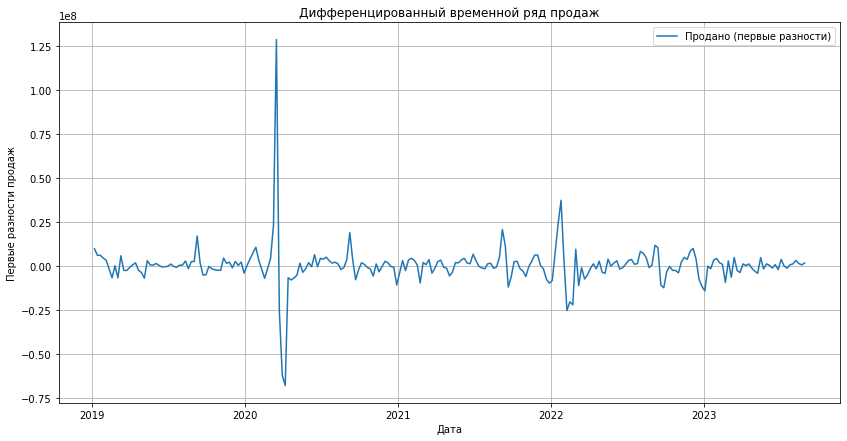

In [141]:
# Применение первых разностей к временному ряду "Продано"
media_wise['Продано_diff'] = media_wise['SalesRub'].diff()

# Повторная проверка стационарности после дифференцирования
adf_test_result_diff = adfuller(media_wise ['Продано_diff'].dropna())

# Вывод результатов ADF теста после дифференцирования
print("ADF Statistic (after differencing): %f" % adf_test_result_diff[0])
print("p-value (after differencing): %f" % adf_test_result_diff[1])
print("Critical Values (after differencing):")
for key, value in adf_test_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Визуализация дифференцированного ряда
plt.figure(figsize=(14, 7))
plt.plot(media_wise['Дата'][1:], media_wise['Продано_diff'][1:], label='Продано (первые разности)')
plt.title('Дифференцированный временной ряд продаж')
plt.xlabel('Дата')
plt.ylabel('Первые разности продаж')
plt.legend()
plt.grid(True)
plt.show()

In [142]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np


def adf_test(series, title=''):
    # Очистка данных от бесконечностей и NaN значений
    series_clean = series.replace([np.inf, -np.inf], np.nan).dropna()
    
    print(f'ADF Test: {title}')
    result = adfuller(series_clean, autolag='AIC')  # ADF test
    labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'critical value ({key})'] = val
    print(out.to_string())  # Выводим результаты теста ADF
    
    if result[1] <= 0.05:
        print("Стационарный ряд на уровне 5%")
    else:
        print("Нестационарный ряд на уровне 5%")
    print("\n")

    
adf_test(media_wise['SalesRub'].dropna(), 'Продажи')

ADF Test: Продажи
ADF test statistic      -4.19
p-value                  0.00
# lags used              3.00
# observations         240.00
critical value (1%)     -3.46
critical value (5%)     -2.87
critical value (10%)    -2.57
Стационарный ряд на уровне 5%




результаты ADF теста показывают, что временной ряд продаж стационарен на уровне значимости 5%. Это значит, что среднее значение и дисперсия ряда не меняются со временем, и он не требует дифференцирования для достижения стационарности.

Вот какие выводы можно сделать из результатов ADF теста:

ADF test statistic (-4.19): Значение статистики ADF меньше критических значений для всех трех уровней (1%, 5% и 10%), что указывает на то, что нулевая гипотеза о наличии единичного корня (и, следовательно, нестационарности ряда) отвергается.

p-value (0.00): P-значение меньше 0.05, что подтверждает отвержение нулевой гипотезы на уровне 5%.

Критические значения: Результат ADF статистики лежит за пределами всех критических значений, что является дополнительным подтверждением стационарности ряда.

In [143]:
media_wise

,year,week,weekB,SalesRub,Sales,SalesRubMonth,R1,R2,R3,R4,...,TRP13,CoverageTV13,InvTV13,InvDigital13,InvSponsorTV13,InvOON13,InvRadio13,Total13,Дата,Продано_diff
0,2019,1,2018-12-31,41535567.34,114621.15,0.00,0.00,0.00,0.00,0.00,...,207.90,15.36,9085528.01,0.00,0.00,0.00,0.00,9085528.01,2018-12-31,NaN
1,2019,2,2019-01-07,51222286.23,141523.20,0.00,0.00,0.00,0.00,0.00,...,317.47,25.53,10599782.68,0.00,0.00,0.00,0.00,10599782.68,2019-01-07,9686718.89
2,2019,3,2019-01-14,57127348.91,157926.30,0.00,0.00,0.00,0.00,0.00,...,192.82,13.91,10599782.68,0.00,0.00,0.00,0.00,10599782.68,2019-01-14,5905062.68
3,2019,4,2019-01-21,63040990.94,173746.65,0.00,0.00,0.00,0.00,0.00,...,138.37,8.05,10599782.68,0.00,0.00,0.00,0.00,10599782.68,2019-01-21,5913642.03
4,2019,5,2019-01-28,67336888.87,185551.80,0.00,0.00,0.00,0.00,0.00,...,286.98,24.22,12893092.41,0.00,0.00,0.00,0.00,12893092.41,2019-01-28,4295897.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2024,48,2024-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-25,NaN
309,2024,49,2024-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-02,NaN
310,2024,50,2024-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-09,NaN
311,2024,51,2024-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-16,NaN


In [144]:
for column in ['Total1', 'Total2', 'Total3', 'Total4', 'Total5', 'Total6', 'Total7',
               'Total8', 'Total9', 'Total10', 'Total11', 'Total12', 'Total13']:
    media_wise[column].fillna(0, inplace=True)


media_wise[['Total1', 'Total2', 'Total3', 'Total4', 'Total5', 'Total6', 'Total7',
            'Total8', 'Total9', 'Total10', 'Total11', 'Total12', 'Total13']].isnull().sum(), 'Продано_diff' in media_wise.columns

(Total1     0
 Total2     0
 Total3     0
 Total4     0
 Total5     0
 Total6     0
 Total7     0
 Total8     0
 Total9     0
 Total10    0
 Total11    0
 Total12    0
 Total13    0
 dtype: int64,
 True)

In [145]:
media_wise.drop('Продано_diff', axis=1, inplace=True)

In [155]:
non_numeric_columns = ['InvTV', 'InvTV2', 'InvTVReg3', 'TRP4', 'TRP6', 'InvTV6', 'InvTV7', 'InvTV9', 'InvTV12', 'InvTV13']

In [156]:
for column in non_numeric_columns:
    media_wise[column] = pd.to_numeric(media_wise[column], errors='coerce')

In [158]:
non_numeric_columns = media_wise.select_dtypes(exclude=[np.number]).columns.tolist()

print(non_numeric_columns)

['weekB', 'Дата']


In [159]:
media_wise_filtered = media_wise[(media_wise['year'] < 2023) | ((media_wise['year'] == 2023) & (media_wise['week'] < 36))]

In [160]:
media_wise_filtered

,year,week,weekB,SalesRub,Sales,SalesRubMonth,R1,R2,R3,R4,...,Total12,TRP13,CoverageTV13,InvTV13,InvDigital13,InvSponsorTV13,InvOON13,InvRadio13,Total13,Дата
0,2019,1,2018-12-31,41535567.34,114621.15,0.00,0.00,0.00,0.00,0.00,...,11834254.13,207.90,15.36,9085528.01,0.00,0.00,0.00,0.00,9085528.01,2018-12-31
1,2019,2,2019-01-07,51222286.23,141523.20,0.00,0.00,0.00,0.00,0.00,...,13996532.16,317.47,25.53,10599782.68,0.00,0.00,0.00,0.00,10599782.68,2019-01-07
2,2019,3,2019-01-14,57127348.91,157926.30,0.00,0.00,0.00,0.00,0.00,...,11466294.66,192.82,13.91,10599782.68,0.00,0.00,0.00,0.00,10599782.68,2019-01-14
3,2019,4,2019-01-21,63040990.94,173746.65,0.00,0.00,0.00,0.00,0.00,...,10764632.16,138.37,8.05,10599782.68,0.00,0.00,0.00,0.00,10599782.68,2019-01-21
4,2019,5,2019-01-28,67336888.87,185551.80,0.00,0.00,0.00,0.00,0.00,...,10984967.91,286.98,24.22,12893092.41,0.00,0.00,0.00,0.00,12893092.41,2019-01-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2023,31,2023-07-31,56931505.06,110088.30,415482902.57,243689995.89,122713435.51,29294571.05,412081.95,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-07-31
240,2023,32,2023-08-07,59881512.89,115345.65,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-08-07
241,2023,33,2023-08-14,61112178.46,117761.70,0.00,0.00,0.00,0.00,0.00,...,69394.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-08-14
242,2023,34,2023-08-21,61594925.03,118356.00,0.00,0.00,0.00,0.00,0.00,...,78529.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-08-21


In [148]:
nan_columns = media_wise_filtered.columns[media_wise_filtered.isnull().any()].tolist()

In [161]:
nan_columns

[]

In [162]:
media_wise_filtered.dtypes

year                       int64
week                       int64
weekB             datetime64[ns]
SalesRub                 float64
Sales                    float64
                       ...      
InvSponsorTV13           float64
InvOON13                 float64
InvRadio13               float64
Total13                  float64
Дата                      object
Length: 136, dtype: object

In [164]:
# Вычисляем корреляционную матрицу
correlation_matrix = media_wise_filtered.corr()

# Находим признаки, корреляция которых с 'SalesRub' больше 0.1
correlated_features = correlation_matrix.index[correlation_matrix["SalesRub"] > 0.2].tolist()

# Удаляем 'SalesRub' из списка, если он там есть
correlated_features.remove('SalesRub') if 'SalesRub' in correlated_features else correlated_features

# Выводим признаки
correlated_features

['Sales',
 'Distribution',
 'Morbidity',
 'InvDigiral',
 'Wordstat',
 'InvDigital1',
 'InvDigital2',
 'InvDigital5',
 'TRP6',
 'CoverageTV6',
 'InvTV6',
 'InvDigital6',
 'Total6',
 'InvTV7',
 'Total7',
 'InvTVReg9',
 'InvDigital11',
 'TRP12',
 'CoverageTV12',
 'InvTV12',
 'InvSponsorTV12',
 'Total12',
 'TRP13',
 'InvDigital13',
 'InvRadio13']

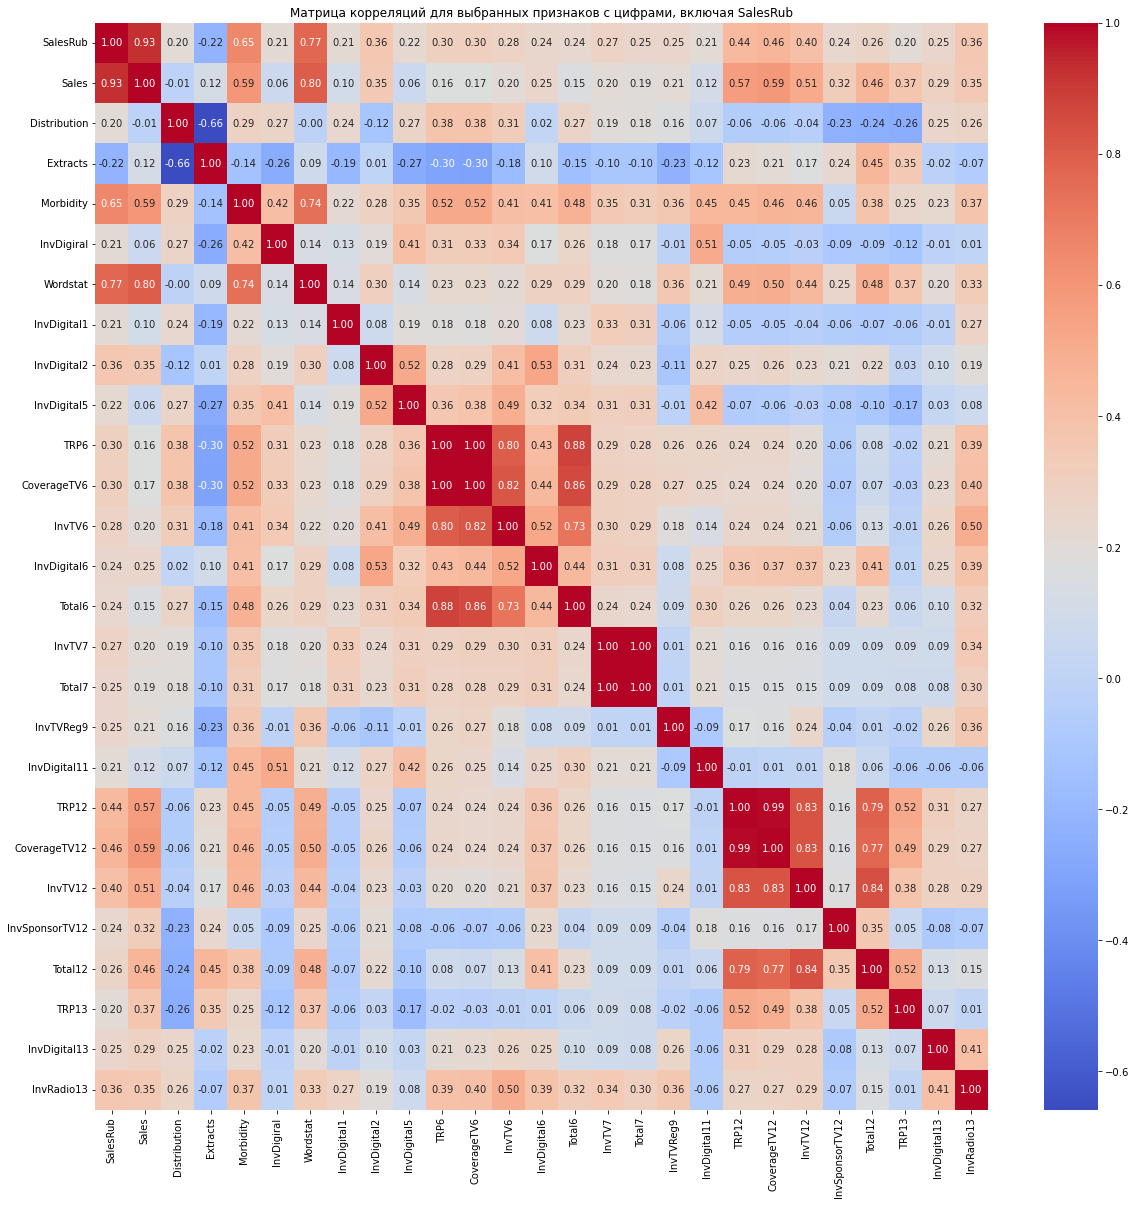

In [165]:
correlation_matrix = media_wise_filtered.corr()

# Находим признаки, корреляция которых с 'SalesRub' больше 0.2 по модулю
features_high_correlation = correlation_matrix.index[abs(correlation_matrix["SalesRub"]) > 0.2].tolist()

# Создаем матрицу корреляций только для выбранных признаков, включая 'SalesRub'
selected_correlation_matrix = correlation_matrix.loc[features_high_correlation, features_high_correlation]

# Выводим матрицу корреляций с аннотациями (цифрами) только для выбранных признаков, включая 'SalesRub'
plt.figure(figsize=(20, 20))
sns.heatmap(selected_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Матрица корреляций для выбранных признаков с цифрами, включая SalesRub')
plt.show()

In [169]:
columns_to_drop = ['SalesRub', 'year', 'week', 'weekB', 'Sales', 'SalesRubMonth', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'Дата']
X = media_wise_filtered.drop(columns=columns_to_drop, errors='ignore')
Y = media_wise_filtered['SalesRub'].dropna()

In [170]:
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Выводим список нечисловых колонок
print(non_numeric_columns)

[]


In [179]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

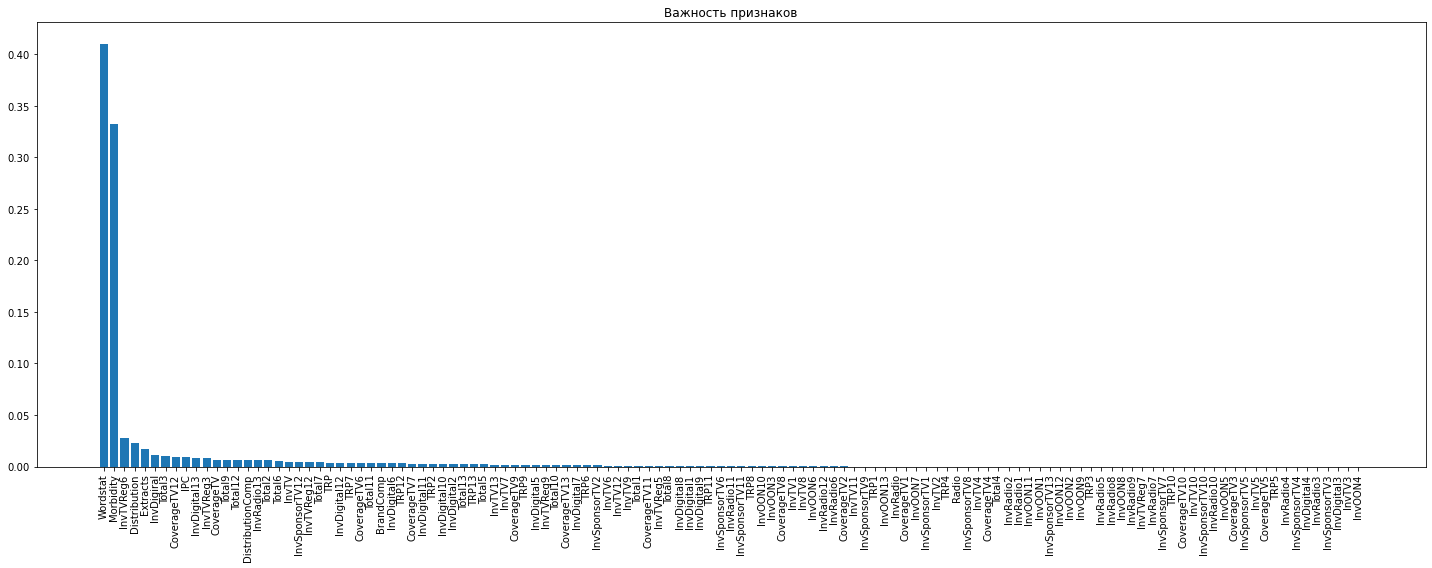

In [180]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor


# Инициализируем и обучаем модель Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_imputed, Y)

import matplotlib.pyplot as plt
import numpy as np

# Получаем важности признаков и сортируем их
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Визуализируем важность признаков
plt.figure(figsize=(20, 8))
plt.title('Важность признаков')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

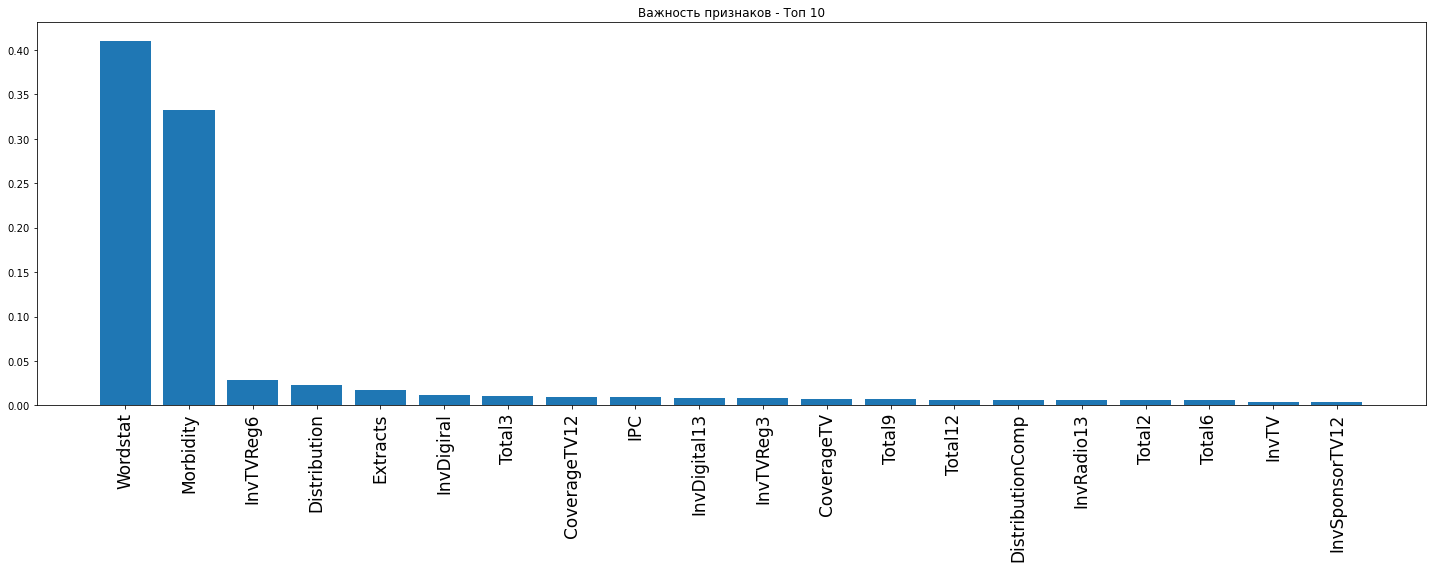

In [181]:
X_imputed = imputer.fit_transform(X)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_imputed, Y)

# Получение важностей признаков и сортировка их
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Визуализация только первых 20 наиболее важных признаков
top_20_indices = indices[:20]  # Индексы для топ-20 наиболее важных признаков
top_20_importances = importances[top_20_indices]
top_20_features = X.columns[top_20_indices]


plt.figure(figsize=(20, 8))
plt.title('Важность признаков - Топ 10')
plt.bar(range(20), top_20_importances, align='center')
plt.xticks(range(20), top_20_features, rotation=90, fontsize=17)  # Настройка размера шрифта для меток оси x
plt.tight_layout()
plt.show()

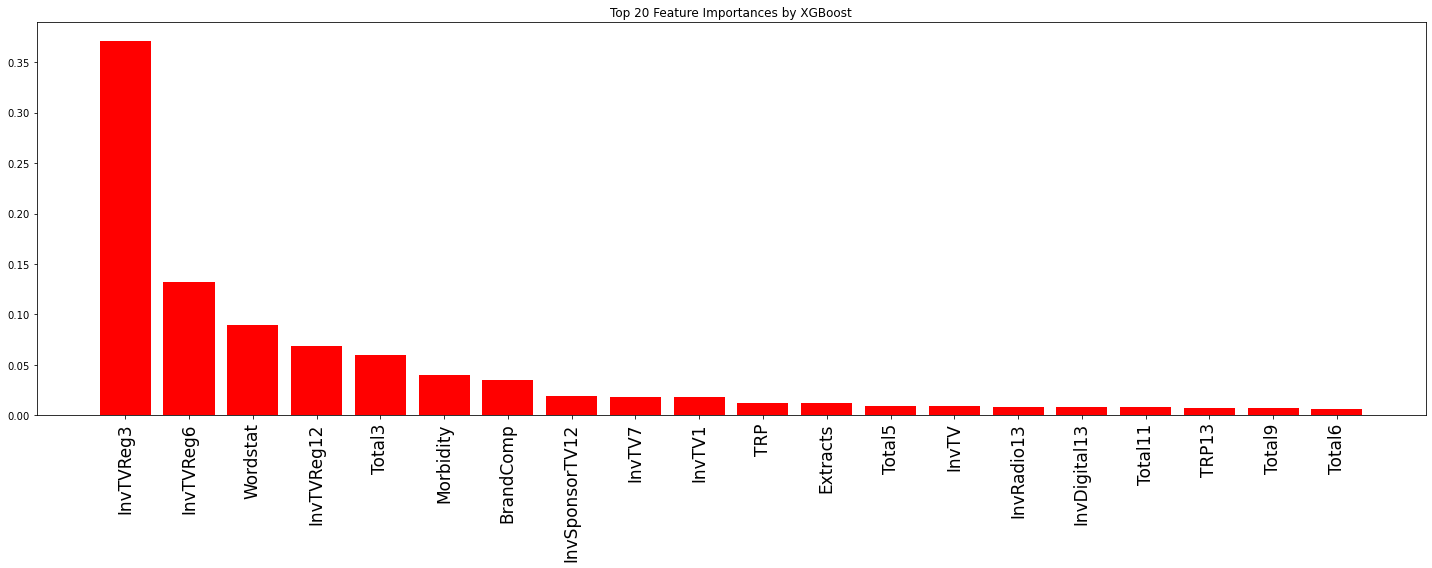

In [182]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Обучение модели XGBoost
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_imputed, Y)

# Получение и визуализация важности признаков
xgb_importances = model.feature_importances_
indices = np.argsort(xgb_importances)[::-1][:20]  # Ограничиваем первыми 20 признаками

plt.figure(figsize=(20, 8))
plt.title('Top 20 Feature Importances by XGBoost')
plt.bar(range(20), xgb_importances[indices], color='r', align='center')
plt.xticks(range(20), X.columns[indices], rotation=90, fontsize=17)
plt.tight_layout()
plt.show()

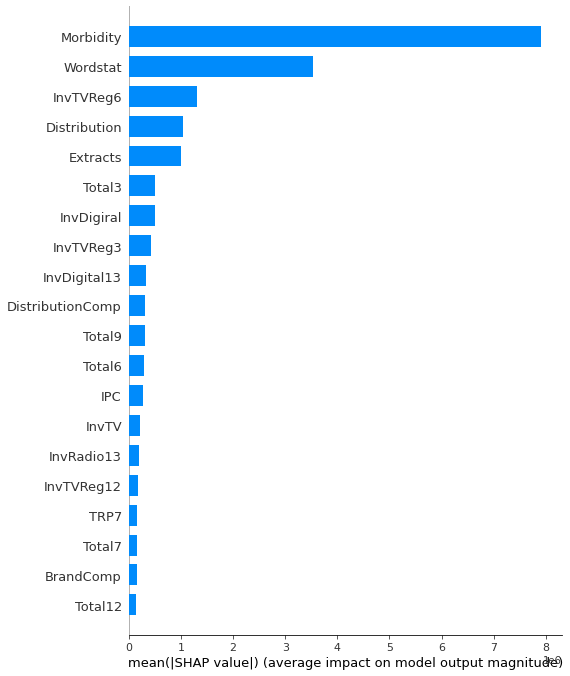

In [174]:
import shap

# Обучение модели и создание explainer объекта
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_imputed)

# Визуализация SHAP значений для топ-20 важных признаков
top_indices = np.argsort(np.abs(shap_values).mean(0))[-20:]
shap.summary_plot(shap_values[:, top_indices], X.iloc[:, top_indices], plot_type="bar")

              Feature  SHAP Importance
2           Morbidity       7907780.41
12           Wordstat       3533941.32
62          InvTVReg6       1296602.95
0        Distribution       1041241.62
1            Extracts       1001727.96
37             Total3        506481.02
9          InvDigiral        498917.50
36          InvTVReg3        414706.84
118      InvDigital13        320293.07
4    DistributionComp        316125.10
89             Total9        302184.34
63             Total6        288330.13
3                 IPC        271319.59
7               InvTV        205119.58
121        InvRadio13        199383.91
113        InvTVReg12        171919.02
64               TRP7        158342.89
72             Total7        157299.71
5           BrandComp        153063.31
114           Total12        141308.00


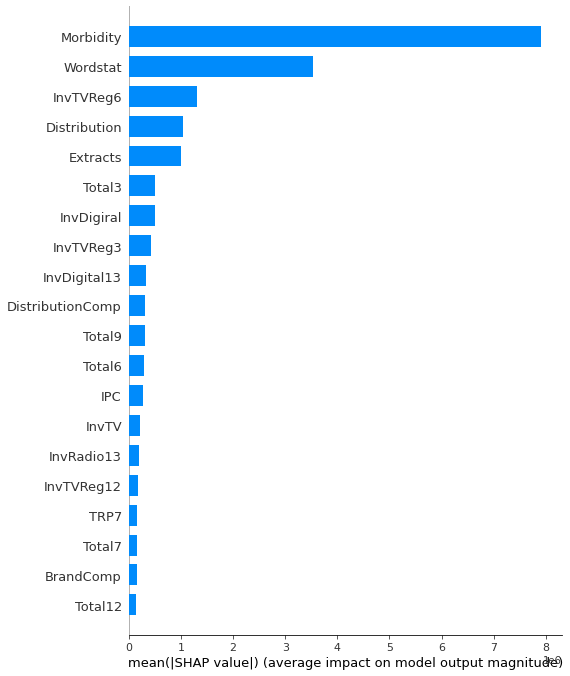

In [175]:
import shap

# Создание объекта explainer для RandomForestRegressor
explainer = shap.TreeExplainer(rf)

# Расчет SHAP значений для всех наблюдений
shap_values = explainer.shap_values(X_imputed)

# Суммирование абсолютных SHAP значений по каждому признаку для оценки общего вклада
shap_sum = np.abs(shap_values).mean(axis=0)
shap_importance = pd.DataFrame(list(zip(X.columns, shap_sum)),
                               columns=['Feature', 'SHAP Importance'])
shap_importance.sort_values(by='SHAP Importance', ascending=False, inplace=True)

# Вывод топ-20 признаков по важности
print(shap_importance.head(20))

# Визуализация важности признаков с помощью SHAP
shap.summary_plot(shap_values, X, plot_type="bar")


In [177]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Подготовка данных для GLM
X_with_const = sm.add_constant(X_imputed)  # Добавляем константу для учета свободного члена

# Предполагаем, что Y распределена нормально, используем GLM с идентичной связующей функцией
glm_normal = sm.GLM(Y, X_with_const, family=sm.families.Gaussian()).fit()

# Предположим, что для Y лучше подходит Пуассоновское распределение
glm_poisson = sm.GLM(Y, X_with_const, family=sm.families.Poisson()).fit()

# Проверим модель с биномиальным распределением, если Y является двоичным или счетным откликом
glm_binomial = sm.GLM(Y, X_with_const, family=sm.families.Binomial()).fit()

# Вывод полных отчетов для каждой модели
print("Отчет модели GLM с нормальным распределением:\n", glm_normal.summary())
print("\nОтчет модели GLM с Пуассоновским распределением:\n", glm_poisson.summary())
print("\nОтчет модели GLM с биномиальным распределением:\n", glm_binomial.summary())


Отчет модели GLM с нормальным распределением:
                  Generalized Linear Model Regression Results                  
Dep. Variable:               SalesRub   No. Observations:                  244
Model:                            GLM   Df Residuals:                      163
Model Family:                Gaussian   Df Model:                           80
Link Function:               identity   Scale:                      6.0022e+13
Method:                          IRLS   Log-Likelihood:                -4167.5
Date:                Sat, 13 Apr 2024   Deviance:                   9.7836e+15
Time:                        00:03:54   Pearson chi2:                 9.78e+15
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9991
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const

invalid value encountered in log
invalid value encountered in log


In [126]:
import statsmodels.api as sm

# Линейная регрессия OLS
X_with_const = sm.add_constant(X_imputed)  # добавляем константу для учета свободного члена
model_ols = sm.OLS(Y, X_with_const).fit()

# Выводим результаты
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               SalesRub   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     21.09
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           2.07e-56
Time:                        23:38:58   Log-Likelihood:                -4167.5
No. Observations:                 244   AIC:                             8497.
Df Residuals:                     163   BIC:                             8780.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.051e+07   6.05e+07      0.999      0.3

In [127]:
from sklearn.linear_model import LassoCV

# Используем кросс-валидацию для поиска оптимального параметра регуляризации alpha
lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, random_state=42)
lasso_cv.fit(X_imputed, Y)

print("Лучшее значение alpha:", lasso_cv.alpha_)
print("Коэффициенты модели Lasso с оптимальным alpha:", lasso_cv.coef_)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4285501408661492.0, tolerance: 9622883973568.078
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3847687599376093.0, tolerance: 9622883973568.078
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3656252626800819.0, tolerance: 9622883973568.078
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3411304695458052.5, tolerance: 9622883973568.078
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3232947733212765.0, tolerance: 9622883973568.078
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3208867815777358.0, tolerance: 9622883973568.078
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3204305670542003.5, tolerance: 9622883973568.078

Лучшее значение alpha: 0.01
Коэффициенты модели Lasso с оптимальным alpha: [ 2.07051941e+07 -6.31829470e+02  1.21531095e+01 -1.21943385e+07
 -6.20249866e+08  1.27093126e+06 -2.73031559e+04  1.77247503e-01
 -6.77914604e+04 -6.72667570e-02  7.18776789e-01  0.00000000e+00
  7.26018986e+02 -9.25753895e+05  1.11237730e+07  1.53815498e+01
 -5.43565460e+00 -3.87154679e+01  0.00000000e+00  0.00000000e+00
  2.14456178e-01 -9.55380525e+04  1.24442385e+06  5.98622547e+00
  8.77989867e+00  1.19797031e+01  0.00000000e+00  0.00000000e+00
 -4.59137735e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.86464154e+01  0.00000000e+00
  3.94778831e+00 -4.69709180e+00  2.87977430e+05 -7.34922268e+06
 -2.02182928e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.44657793e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.61690006e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.19849593e+01  2.43952498e+00 -6.31307307e+04
  1.29766834e+0

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3681979334255157.5, tolerance: 10473656796255.053
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3674402771428544.5, tolerance: 10473656796255.053
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3669002730069920.5, tolerance: 10473656796255.053
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3664168576369405.5, tolerance: 10473656796255.053
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3659707904503240.0, tolerance: 10473656796255.053
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3655576644163778.5, tolerance: 10473656796255.053
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3651748093290711.0, tolerance: 10473656796

In [128]:
from sklearn.linear_model import RidgeCV

# Используем кросс-валидацию для поиска оптимального параметра регуляризации alpha
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge_cv.fit(X_imputed, Y)

print("Лучшее значение alpha для Ridge:", ridge_cv.alpha_)
print("Коэффициенты модели Ridge с оптимальным alpha:", ridge_cv.coef_)

Лучшее значение alpha для Ridge: 100.0
Коэффициенты модели Ridge с оптимальным alpha: [-1.02342825e+04 -4.81475814e+02  1.04412370e+01 -3.45293619e+03
 -9.26441545e+03 -8.06060794e+05 -3.34569066e+04  2.12819900e-01
  5.09106080e+04 -2.29065934e-01  3.93921741e-01  3.67562654e-05
  7.04396510e+02 -1.30551451e+05  3.66228912e+04  1.70032323e+01
 -3.67807744e+00 -2.27298942e+01  0.00000000e+00  0.00000000e+00
 -9.40821248e+00 -4.10223162e+04  4.47461080e+03  1.00889180e+02
  1.01166895e+02  9.86121154e+01  0.00000000e+00  0.00000000e+00
 -9.64553743e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.77311337e+00  0.00000000e+00
  3.32619185e+00 -4.76967790e+00  3.16915737e+03 -1.08461230e-07
 -2.23589096e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.23683393e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.49732613e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.19966975e-01 -2.10160446e+00 -1.72121079e+04
  6.

Ill-conditioned matrix (rcond=1.47107e-17): result may not be accurate.
Ill-conditioned matrix (rcond=8.54136e-17): result may not be accurate.
Ill-conditioned matrix (rcond=6.93053e-17): result may not be accurate.
Ill-conditioned matrix (rcond=7.36422e-17): result may not be accurate.


In [129]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Подготовка данных для GLM
X_with_const = sm.add_constant(X_imputed)  # Добавляем константу для учета свободного члена

# Предполагаем, что Y распределена нормально, используем GLM с идентичной связующей функцией
glm_normal = sm.GLM(Y, X_with_const, family=sm.families.Gaussian()).fit()

# Предположим, что для Y лучше подходит Пуассоновское распределение
glm_poisson = sm.GLM(Y, X_with_const, family=sm.families.Poisson()).fit()

# Проверим модель с биномиальным распределением, если Y является двоичным или счетным откликом
glm_binomial = sm.GLM(Y, X_with_const, family=sm.families.Binomial()).fit()

# Вывод полных отчетов для каждой модели
print("Отчет модели GLM с нормальным распределением:\n", glm_normal.summary())
print("\nОтчет модели GLM с Пуассоновским распределением:\n", glm_poisson.summary())
print("\nОтчет модели GLM с биномиальным распределением:\n", glm_binomial.summary())


Отчет модели GLM с нормальным распределением:
                  Generalized Linear Model Regression Results                  
Dep. Variable:               SalesRub   No. Observations:                  244
Model:                            GLM   Df Residuals:                      163
Model Family:                Gaussian   Df Model:                           80
Link Function:               identity   Scale:                      6.0022e+13
Method:                          IRLS   Log-Likelihood:                -4167.5
Date:                Fri, 12 Apr 2024   Deviance:                   9.7836e+15
Time:                        23:46:22   Pearson chi2:                 9.78e+15
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9991
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const

invalid value encountered in log
invalid value encountered in log


In [130]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Создаем RandomForestRegressor и обучаем его
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_imputed, Y)

# Создаем explainer и вычисляем SHAP значения
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_imputed)

# Сортируем признаки по важности
shap_importance = pd.DataFrame(list(zip(X.columns, np.abs(shap_values).mean(0))),
                               columns=['Feature', 'SHAP Importance'])
shap_importance.sort_values(by='SHAP Importance', ascending=False, inplace=True)

# Выбираем топ-20 признаков
top_features = shap_importance.head(20)['Feature'].values

# Фильтруем 'X_imputed' для использования только топ-20 признаков
top_indices = [list(X.columns).index(feature) for feature in top_features]
X_top_imputed = X_imputed[:, top_indices]

# Добавляем константу к отфильтрованным признакам
X_top_with_const = sm.add_constant(X_top_imputed)

# Построение GLM
glm = sm.GLM(Y, X_top_with_const, family=sm.families.Gaussian()).fit()
print(glm.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               SalesRub   No. Observations:                  244
Model:                            GLM   Df Residuals:                      223
Model Family:                Gaussian   Df Model:                           20
Link Function:               identity   Scale:                      1.1486e+14
Method:                          IRLS   Log-Likelihood:                -4285.0
Date:                Fri, 12 Apr 2024   Deviance:                   2.5613e+16
Time:                        23:51:46   Pearson chi2:                 2.56e+16
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9527
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.057e+08   5.91e+07      1.789      0.0

In [132]:
X_imputed

array([[9.21069767e-01, 9.96985954e+04, 5.08956000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 9.08552801e+06],
       [9.21069767e-01, 9.96985954e+04, 8.04825000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 1.05997827e+07],
       [9.21069767e-01, 9.96985954e+04, 9.93384000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 1.05997827e+07],
       ...,
       [9.97500000e-01, 6.44085842e+04, 3.98580000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.97500000e-01, 6.44085842e+04, 4.29240000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.97500000e-01, 6.44085842e+04, 4.59900000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [131]:
import statsmodels.api as sm

# Преобразуем X_imputed обратно в DataFrame с правильными именами колонок
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Теперь мы можем добавить константу непосредственно к DataFrame
X_with_const = sm.add_constant(X_imputed_df)

# Теперь выбираем только топ-20 признаков на основе SHAP значений
top_features = shap_importance.head(20)['Feature']
X_top_features = X_with_const[top_features]

# Построение GLM с топ-20 признаками
glm = sm.GLM(Y, X_top_features, family=sm.families.Gaussian()).fit()

# Вывод результатов с названиями переменных
print(glm.summary())

ValueError: The indices for endog and exog are not aligned

In [184]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import shap

# Предположим, что media_wise_filtered уже загружен и содержит все необходимые данные
# Определение столбцов для удаления
columns_to_drop = ['SalesRub', 'year', 'week', 'weekB', 'Sales', 'SalesRubMonth', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6']
X = media_wise_filtered.drop(columns=columns_to_drop, errors='ignore')
Y = media_wise_filtered['SalesRub'].dropna()

# Исправление нечисловых данных и заполнение пропусков
X = X.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Обучение RandomForest для вычисления SHAP значений
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_imputed, Y)

# Создание SHAP explainer и получение значений
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_imputed)

# Сортировка признаков по важности SHAP и выбор топ-20
shap_importance = pd.DataFrame(list(zip(X.columns, np.abs(shap_values).mean(0))),
                               columns=['Feature', 'SHAP Importance'])
shap_importance.sort_values(by='SHAP Importance', ascending=False, inplace=True)
top_features = shap_importance.head(20)['Feature'].values

# Фильтрация X для использования только топ-20 признаков
X_top = X_imputed[top_features]

# Добавление константы для учета свободного члена в модели
X_top_with_const = sm.add_constant(X_top)

# Построение и обучение GLM
glm = sm.GLM(Y, X_top_with_const, family=sm.families.Gaussian()).fit()

# Вывод результатов
print(glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               SalesRub   No. Observations:                  244
Model:                            GLM   Df Residuals:                      223
Model Family:                Gaussian   Df Model:                           20
Link Function:               identity   Scale:                      1.1486e+14
Method:                          IRLS   Log-Likelihood:                -4285.0
Date:                Sat, 13 Apr 2024   Deviance:                   2.5613e+16
Time:                        00:08:58   Pearson chi2:                 2.56e+16
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9527
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.057e+08   5.91e+07  

In [187]:
# Фильтрация X для использования только топ-20 признаков
X_top = X_imputed[top_features]

# Добавление константы для учета свободного члена в модели
X_top_with_const = sm.add_constant(X_top)

# Построение и первоначальное обучение GLM
initial_glm = sm.GLM(Y, X_top_with_const, family=sm.families.Gaussian()).fit()

# Фильтрация признаков на основе p-значений
results_summary = initial_glm.summary2().tables[1]
significant_features = results_summary[results_summary['P>|z|'] <= 0.05].index.tolist()

# Повторное использование только значимых признаков
X_significant = X_top_with_const[significant_features]

# Построение и обучение улучшенной GLM
glm_improved = sm.GLM(Y, X_significant, family=sm.families.Gaussian()).fit()

# Вывод результатов улучшенной модели
print(glm_improved.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               SalesRub   No. Observations:                  244
Model:                            GLM   Df Residuals:                      236
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                      1.2799e+14
Method:                          IRLS   Log-Likelihood:                -4305.1
Date:                Sat, 13 Apr 2024   Deviance:                   3.0205e+16
Time:                        00:17:51   Pearson chi2:                 3.02e+16
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9249
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Wordstat     955.0632     37.672     25.352      0.0

In [188]:
import pandas as pd
import numpy as np
from itertools import combinations
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.impute import SimpleImputer

# Подготовка данных
X = media_wise_filtered.drop(columns=columns_to_drop, errors='ignore').select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X = X.clip(lower=0.01)  # Заменяем нули и отрицательные значения на 0.01

# Теперь безопасно применяем логарифм
X_logged = np.log(X)


# Проверка стационарности каждой переменной
def check_stationarity(data, threshold=0.05):
    p_values = {}
    for column in data.columns:
        p_value = adfuller(data[column])[1]  # p-value from the ADF test
        p_values[column] = p_value
    return {k: v for k, v in p_values.items() if v < threshold}

stationary_variables = check_stationarity(X_imputed)
X_stationary = X_imputed[stationary_variables.keys()]

# Генерация всех возможных комбинаций признаков
all_combinations = sum([list(combinations(X_stationary.columns, i)) for i in range(1, len(X_stationary.columns) + 1)], [])

# Словарь для сохранения AIC каждой модели
aic_values = {}

# Построение моделей VAR для каждой комбинации
for combo in all_combinations:
    model = VAR(X_stationary[list(combo)])
    results = model.fit(maxlags=15, ic='aic')
    aic_values[combo] = results.aic

# Выбор 10 комбинаций с наименьшим AIC
best_combinations = sorted(aic_values, key=aic_values.get)[:10]

# Вывод лучших комбинаций и их AIC
for combo in best_combinations:
    print(f"Combination: {combo}, AIC: {aic_values[combo]}")


divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
divide by zero

MemoryError: 

In [189]:
from itertools import combinations

# Генерация комбинаций с ограничением до 5 признаков
max_features_in_combination = 7
all_combinations = sum([list(combinations(X_stationary.columns, i)) for i in range(1, max_features_in_combination + 1)], [])

# Словарь для сохранения AIC каждой модели
aic_values = {}

# Построение моделей VAR для каждой комбинации и вычисление AIC
for combo in all_combinations:
    model = VAR(X_stationary[list(combo)])
    try:
        results = model.fit(maxlags=15, ic='aic')
        aic_values[combo] = results.aic
    except Exception as e:
        aic_values[combo] = np.inf  # Назначаем бесконечность для моделей, которые не могут быть построены

# Выбор 10 комбинаций с наименьшим AIC
best_combinations = sorted(aic_values, key=aic_values.get)[:10]

# Вывод лучших комбинаций и их AIC
for combo in best_combinations:
    print(f"Combination: {combo}, AIC: {aic_values[combo]}")


MemoryError: 

In [190]:
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
import pandas as pd

# Предполагаем, что Y загружен и представляет собой временной ряд целевой переменной
Y = media_wise_filtered['SalesRub'].dropna()

# Разделение данных на обучающую и тестовую выборки
n_forecast = 28  # Количество периодов для прогнозирования
train, test = model_selection.train_test_split(Y, test_size=n_forecast)

# Подбор модели ARIMA
auto_model = pm.auto_arima(train, seasonal=True, m=12, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True,
                           information_criterion='aic',  # Выбор модели по AIC
                           out_of_sample_size=n_forecast)  # Количество данных для тестирования "out of sample"

# Вывод лучших параметров
print("Выбранные параметры модели ARIMA (p,d,q) и (P,D,Q,m):")
print(f"    ARIMA{auto_model.order}x{auto_model.seasonal_order}")

# Обучение выбранной модели на полных данных
model_fit = auto_model.fit(Y)

# Прогнозирование
forecast = model_fit.predict(n_periods=n_forecast)

# Вывод прогноза
print("Прогноз на следующие 28 периодов:")
print(forecast)

# Оценка прогноза
r2 = r2_score(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)

print(f"R²: {r2}")
print(f"MAPE: {mape}")


ModuleNotFoundError: No module named 'pmdarima'

In [191]:
!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/a3/94/af13b58081670aa16a82ff6b062032d50994cae87cc806c40f1c9c97a5e1/pmdarima-2.0.4-cp38-cp38-win_amd64.whl.metadata


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 615.5/615.5 kB 2.3 MB/s eta 0:00:00


In [194]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Предполагаем, что Y загружен и представляет собой временной ряд целевой переменной
Y = media_wise_filtered['SalesRub'].dropna()

# Разделение данных на обучающую и тестовую выборки
n_forecast = 28  # Количество периодов для прогнозирования
train, test = model_selection.train_test_split(Y, test_size=n_forecast)

# Подбор модели ARIMA
auto_model = pm.auto_arima(train, seasonal=True, m=12, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True,
                           information_criterion='aic',  # Выбор модели по AIC
                           out_of_sample_size=n_forecast)  # Количество данных для тестирования "out of sample"

# Вывод лучших параметров
print("Выбранные параметры модели ARIMA (p,d,q) и (P,D,Q,m):")
print(f"    ARIMA{auto_model.order}x{auto_model.seasonal_order}")

# Обучение выбранной модели на полных данных
model_fit = auto_model.fit(Y)

# Прогнозирование
forecast = model_fit.predict(n_periods=n_forecast)

# Вывод прогноза
print("Прогноз на следующие 28 периодов:")
print(forecast)

# Оценка прогноза
r2 = r2_score(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)

print(f"R²: {r2}")
print(f"MAPE: {mape}")


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7651.857, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7637.989, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7634.220, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7649.779, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=7632.359, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=7634.230, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=7636.099, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=7633.977, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=7634.286, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=7636.075, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=7630.363, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=7632.235, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12]     

In [196]:
import numpy as np

def prepare_lstm_data(data, history_length=60, forecast_horizon=28):
    X, Y = [], []
    for i in range(len(media_wise_filtered) - history_length - forecast_horizon + 1):
        X.append(media_wise_filtered[i:i+history_length])
        Y.append(media_wise_filtered[i+history_length:i+history_length+forecast_horizon])
    return np.array(X), np.array(Y)

# Пример использования
history_length = 60
forecast_horizon = 28
X_lstm, Y_lstm = prepare_lstm_data(data.values, history_length, forecast_horizon)
print("Форма X_lstm:", X_lstm.shape)
print("Форма Y_lstm:", Y_lstm.shape)


NameError: name 'data' is not defined